![img](https://imgur.com/ofMX5VN.png 'Header')

# With the tragic that shocked not only basketball but the whole world, I decided to celebrate amazing life and career of a distiguished athlete, competitor and a father by vizualizing his lifetime achievements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('Pandas and NumPy ---> \timported!')
print('Matplotlib ---> \timported!')

Pandas and NumPy ---> 	imported!
Matplotlib ---> 	imported!


In [2]:
df = pd.read_csv('kb24.csv')
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [3]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

* I create the new dataframe containing only the columns needed for the charts

In [4]:
kb_shots = df[['season', 'game_date','loc_x', 'loc_y', 'shot_made_flag', 'opponent']]
kb_shots.shape

(30697, 6)

In [5]:
print(kb_shots.dtypes)
print('The shape is', kb_shots.shape)
print('And we have', kb_shots['shot_made_flag'].isna().sum(), 'NaN values')

season             object
game_date          object
loc_x               int64
loc_y               int64
shot_made_flag    float64
opponent           object
dtype: object
The shape is (30697, 6)
And we have 5000 NaN values


In [6]:
kb = kb_shots.dropna()
# kb = kb.reset_index(drop=True)
kb.shape

(25697, 6)

In [7]:
kb.set_index(kb['season'], inplace=True)
kb.tail(10)

,season,game_date,loc_x,loc_y,shot_made_flag,opponent
season,,,,,,
1999-00,1999-00,2000-06-19,81,250,0.0,IND
1999-00,1999-00,2000-06-19,40,100,0.0,IND
1999-00,1999-00,2000-06-19,-126,61,1.0,IND
1999-00,1999-00,2000-06-19,-12,679,0.0,IND
1999-00,1999-00,2000-06-19,-113,100,0.0,IND
1999-00,1999-00,2000-06-19,0,0,0.0,IND
1999-00,1999-00,2000-06-19,1,48,0.0,IND
1999-00,1999-00,2000-06-19,-134,166,1.0,IND
1999-00,1999-00,2000-06-19,31,267,0.0,IND


* I divide dataset in four parts to create four different charts grouped by 5 years of his career

In [8]:
kb1 = kb.loc[['1996-97', '1997-98', '1998-99', '1999-2000', '2000-01']]
kb2 = kb.loc[['2001-02', '2002-03', '2003-04', '2004-05', '2005-06']]
kb3 = kb.loc[['2006-07', '2007-08', '2008-09', '2009-10', '2010-11']]
kb4 = kb.loc[['2011-12', '2012-13', '2013-14', '2014-15', '2015-16']]

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [9]:
kb.reset_index(drop=True)
print(kb1.shape)
print(kb2.shape)
print(kb3.shape)
print(kb4.shape)

(3534, 6)
(7982, 6)
(8542, 6)
(4328, 6)


# SHOT CHART!

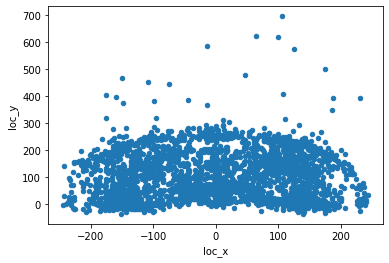

In [10]:
kb1.plot.scatter('loc_x', 'loc_y')

In [11]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


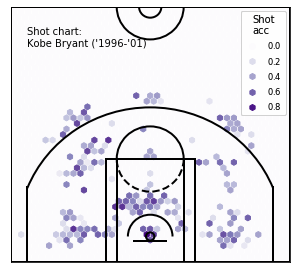

In [12]:
shots_hex = plt.hexbin(
    kb1.loc_x, kb1.loc_y,
    extent=(-250, 250, 422.5, -47.5), cmap=plt.cm.Reds, gridsize=25)
shots_by_hex = shots_hex.get_array()
freq_by_hex = shots_by_hex / sum(shots_by_hex)
sizes = freq_by_hex / max(freq_by_hex) * 120
plt.close()

shots_hex = plt.hexbin(
    kb1.loc_x, kb1.loc_y,
    extent=(-250, 250, 422.5, -47.5), cmap='Purples', gridsize=40)
plt.close()  # this closes the plot window

makes_df = kb1[kb1.shot_made_flag == 1]
makes_hex = plt.hexbin(
    makes_df['loc_x'], makes_df['loc_y'],
    extent=(-250, 250, 422.5, -47.5), cmap=plt.cm.Reds, gridsize=40)
plt.close()
pcts_by_hex = makes_hex.get_array() / shots_hex.get_array()
sample_sizes = shots_hex.get_array()
filter_threshold = 5
for i in range(len(pcts_by_hex)):
    if sample_sizes[i] < filter_threshold:
        pcts_by_hex[i] = 0
x = [i[0] for i in shots_hex.get_offsets()]
y = [i[1] for i in shots_hex.get_offsets()]
z = pcts_by_hex
plt.figure(figsize=(5, 4.7))
plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)
plt.scatter(x, y, c=z, cmap='Purples', marker='h')
plt.text(220, 350, "Shot chart: \nKobe Bryant ('1996-'01)")
draw_court(outer_lines=True)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)

sizes = freq_by_hex
sizes = sizes / max(sizes) * 40
max_freq = max(freq_by_hex)
max_size = max(sizes)

scatter = plt.scatter(x, y, c=z, s=sizes, cmap='Purples', marker='h')
legend1 = plt.legend(
    *scatter.legend_elements(num=6),
    loc="upper right", title='Shot\nacc', fontsize='small')
plt.gca().add_artist(legend1)

my_dpi = 80
plt.savefig('kb1.png', dpi=my_dpi * 10)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


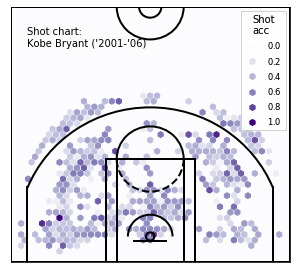

In [13]:
shots_hex = plt.hexbin(
    kb2.loc_x, kb2.loc_y,
    extent=(-250, 250, 422.5, -47.5), cmap=plt.cm.Reds, gridsize=25)
shots_by_hex = shots_hex.get_array()
freq_by_hex = shots_by_hex / sum(shots_by_hex)
sizes = freq_by_hex / max(freq_by_hex) * 120
plt.close()

shots_hex = plt.hexbin(
    kb2.loc_x, kb2.loc_y,
    extent=(-250, 250, 422.5, -47.5), cmap='Purples', gridsize=40)
plt.close()  # this closes the plot window

makes_df = kb2[kb2.shot_made_flag == 1]
makes_hex = plt.hexbin(
    makes_df['loc_x'], makes_df['loc_y'],
    extent=(-250, 250, 422.5, -47.5), cmap=plt.cm.Reds, gridsize=40)
plt.close()
pcts_by_hex = makes_hex.get_array() / shots_hex.get_array()
sample_sizes = shots_hex.get_array()
filter_threshold = 7
for i in range(len(pcts_by_hex)):
    if sample_sizes[i] < filter_threshold:
        pcts_by_hex[i] = 0
x = [i[0] for i in shots_hex.get_offsets()]
y = [i[1] for i in shots_hex.get_offsets()]
z = pcts_by_hex
plt.figure(figsize=(5, 4.7))
plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)
plt.scatter(x, y, c=z, cmap='Purples', marker='h')
plt.text(220, 350, "Shot chart: \nKobe Bryant ('2001-'06)")
draw_court(outer_lines=True)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)

sizes = freq_by_hex
sizes = sizes / max(sizes) * 40
max_freq = max(freq_by_hex)
max_size = max(sizes)

scatter = plt.scatter(x, y, c=z, s=sizes, cmap='Purples', marker='h')
legend1 = plt.legend(
    *scatter.legend_elements(num=6),
    loc="upper right", title='Shot\nacc', fontsize='small')
plt.gca().add_artist(legend1)

my_dpi = 80
plt.savefig('kb2.png', dpi=my_dpi * 10)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


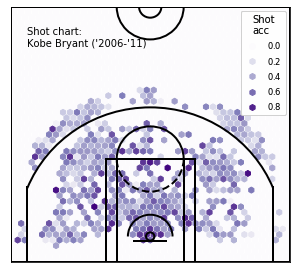

In [14]:
shots_hex = plt.hexbin(
    kb3.loc_x, kb3.loc_y,
    extent=(-250, 250, 422.5, -47.5), cmap=plt.cm.Reds, gridsize=25)
shots_by_hex = shots_hex.get_array()
freq_by_hex = shots_by_hex / sum(shots_by_hex)
sizes = freq_by_hex / max(freq_by_hex) * 120
plt.close()

shots_hex = plt.hexbin(
    kb3.loc_x, kb3.loc_y,
    extent=(-250, 250, 422.5, -47.5), cmap='Purples', gridsize=40)
plt.close()  # this closes the plot window

makes_df = kb3[kb3.shot_made_flag == 1]
makes_hex = plt.hexbin(
    makes_df['loc_x'], makes_df['loc_y'],
    extent=(-250, 250, 422.5, -47.5), cmap=plt.cm.Reds, gridsize=40)
plt.close()
pcts_by_hex = makes_hex.get_array() / shots_hex.get_array()
sample_sizes = shots_hex.get_array()
filter_threshold = 7
for i in range(len(pcts_by_hex)):
    if sample_sizes[i] < filter_threshold:
        pcts_by_hex[i] = 0
x = [i[0] for i in shots_hex.get_offsets()]
y = [i[1] for i in shots_hex.get_offsets()]
z = pcts_by_hex
plt.figure(figsize=(5, 4.7))
plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)
plt.scatter(x, y, c=z, cmap='Purples', marker='h')
plt.text(220, 350, "Shot chart: \nKobe Bryant ('2006-'11)")
draw_court(outer_lines=True)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)

sizes = freq_by_hex
sizes = sizes / max(sizes) * 40
max_freq = max(freq_by_hex)
max_size = max(sizes)

scatter = plt.scatter(x, y, c=z, s=sizes, cmap='Purples', marker='h')
legend1 = plt.legend(
    *scatter.legend_elements(num=6),
    loc="upper right", title='Shot\nacc', fontsize='small')
plt.gca().add_artist(legend1)

my_dpi = 80
plt.savefig('kb3.png', dpi=my_dpi * 10)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


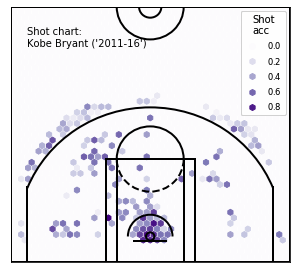

In [15]:
shots_hex = plt.hexbin(
    kb4.loc_x, kb4.loc_y,
    extent=(-250, 250, 422.5, -47.5), cmap=plt.cm.Reds, gridsize=25)
shots_by_hex = shots_hex.get_array()
freq_by_hex = shots_by_hex / sum(shots_by_hex)
sizes = freq_by_hex / max(freq_by_hex) * 120
plt.close()

shots_hex = plt.hexbin(
    kb4.loc_x, kb4.loc_y,
    extent=(-250, 250, 422.5, -47.5), cmap='Purples', gridsize=40)
plt.close()  # this closes the plot window

makes_df = kb4[kb4.shot_made_flag == 1]
makes_hex = plt.hexbin(
    makes_df['loc_x'], makes_df['loc_y'],
    extent=(-250, 250, 422.5, -47.5), cmap=plt.cm.Reds, gridsize=40)
plt.close()
pcts_by_hex = makes_hex.get_array() / shots_hex.get_array()
sample_sizes = shots_hex.get_array()
filter_threshold = 7
for i in range(len(pcts_by_hex)):
    if sample_sizes[i] < filter_threshold:
        pcts_by_hex[i] = 0
x = [i[0] for i in shots_hex.get_offsets()]
y = [i[1] for i in shots_hex.get_offsets()]
z = pcts_by_hex
plt.figure(figsize=(5, 4.7))
plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)
plt.scatter(x, y, c=z, cmap='Purples', marker='h')
plt.text(220, 350, "Shot chart: \nKobe Bryant ('2011-16')")
draw_court(outer_lines=True)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)

sizes = freq_by_hex
sizes = sizes / max(sizes) * 40
max_freq = max(freq_by_hex)
max_size = max(sizes)

scatter = plt.scatter(x, y, c=z, s=sizes, cmap='Purples', marker='h')
legend1 = plt.legend(
    *scatter.legend_elements(num=6),
    loc="upper right", title='Shot\nacc', fontsize='small')
plt.gca().add_artist(legend1)

my_dpi = 80
plt.savefig('kb4.png', dpi=my_dpi * 10)

# vs YOUR TEAM!

In [16]:
kb.reset_index(drop=True)
kb.set_index(kb['opponent'], inplace=True)
kb.head()

,season,game_date,loc_x,loc_y,shot_made_flag,opponent
opponent,,,,,,
POR,2000-01,2000-10-31,-157,0,0.0,POR
POR,2000-01,2000-10-31,-101,135,1.0,POR
POR,2000-01,2000-10-31,138,175,0.0,POR
POR,2000-01,2000-10-31,0,0,1.0,POR
POR,2000-01,2000-10-31,-145,-11,0.0,POR


---
## His historic shot selection against my favorite Philadelphia Sixers

In [17]:
phi = kb.loc[['PHI']]

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


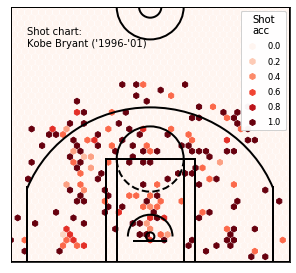

In [18]:
shots_by_hex = shots_hex.get_array()
freq_by_hex = shots_by_hex / sum(shots_by_hex)
sizes = freq_by_hex / max(freq_by_hex) * 120


shots_hex = plt.hexbin(
    phi.loc_x, phi.loc_y,
    extent=(-250, 250, 422.5, -47.5), cmap='Reds', gridsize=40)
plt.close()  # this closes the plot window

makes_df = phi[phi.shot_made_flag == 1]
makes_hex = plt.hexbin(
    makes_df['loc_x'], makes_df['loc_y'],
    extent=(-250, 250, 422.5, -47.5), cmap=plt.cm.Reds, gridsize=40)
plt.close()
pcts_by_hex = makes_hex.get_array() / shots_hex.get_array()
sample_sizes = shots_hex.get_array()
filter_threshold = 1
for i in range(len(pcts_by_hex)):
    if sample_sizes[i] < filter_threshold:
        pcts_by_hex[i] = 0
x = [i[0] for i in shots_hex.get_offsets()]
y = [i[1] for i in shots_hex.get_offsets()]
z = pcts_by_hex
plt.figure(figsize=(5, 4.7))
plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)
plt.scatter(x, y, c=z, cmap='Reds', marker='h')
plt.text(220, 350, "Shot chart: \nKobe Bryant ('1996-'01)")
draw_court(outer_lines=True)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)

sizes = freq_by_hex
sizes = sizes / max(sizes) * 40
max_freq = max(freq_by_hex)
max_size = max(sizes)

scatter = plt.scatter(x, y, c=z, s=sizes, cmap='Reds', marker='h')
legend1 = plt.legend(
    *scatter.legend_elements(num=6),
    loc="upper right", title='Shot\nacc', fontsize='small')
plt.gca().add_artist(legend1)

my_dpi = 80
plt.savefig('phi.png', dpi=my_dpi * 10)